7. Create a violin plot to visualize the distribution of ratings for each app category, 
but only include categories with more than 50 apps and app name should contain letter “C” 
and exclude apps with fewer than 10 reviews and rating should be less 4.0. this graph should 
work only between 4 PM IST to 6 PM IST apart from that time we should not show this graph in dashboard itself.



Proceeding to generate the violin plot...


C:\Users\USER\AppData\Local\Temp\ipykernel_4636\3800952372.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_4636\3800952372.py:45: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


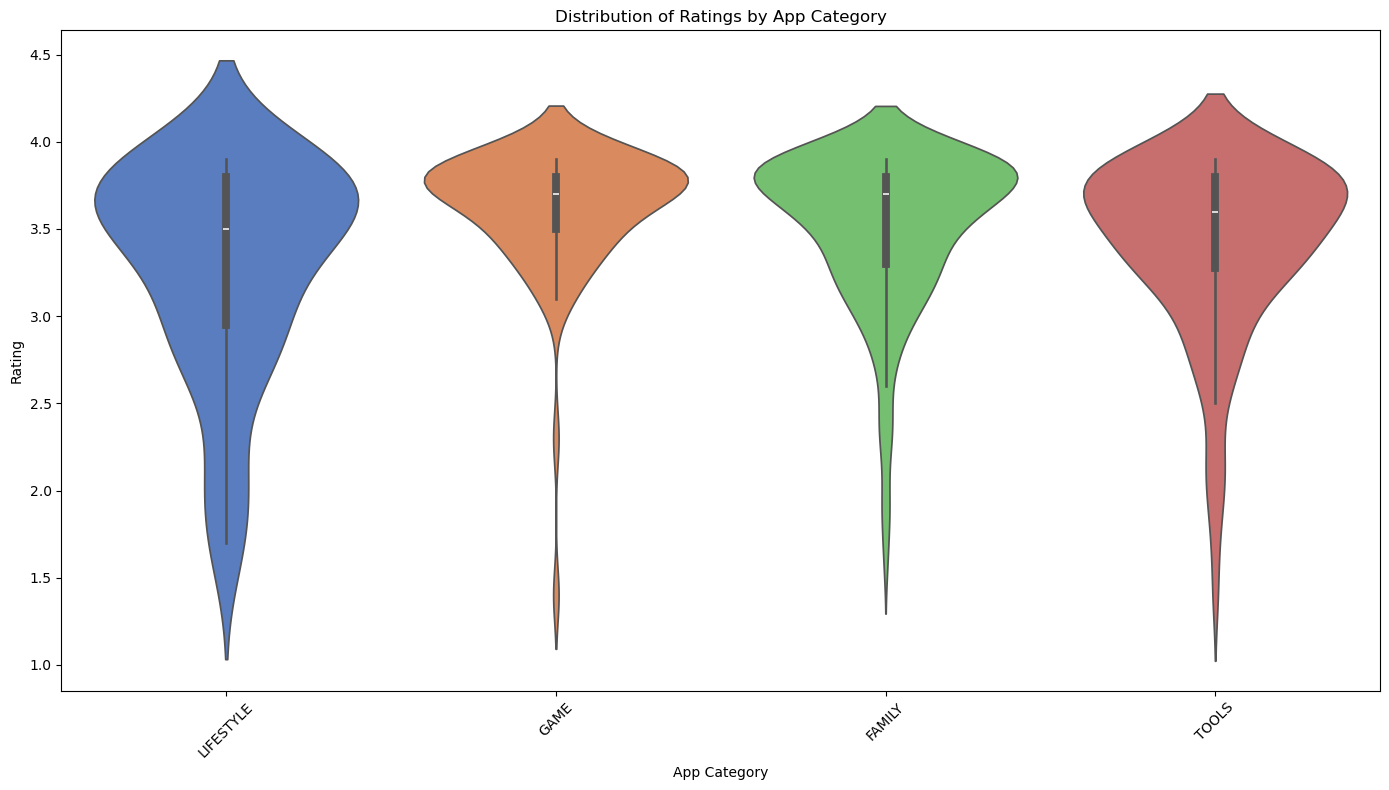

In [8]:
from datetime import datetime
import pytz
import pandas as pd

# Define IST timezone and get current time in IST
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)

# Check if current time is between 4 PM and 6 PM IST
start_time = current_time.replace(hour=16, minute=0, second=0, microsecond=0)
end_time = current_time.replace(hour=18, minute=0, second=0, microsecond=0)

if start_time <= current_time <= end_time:
    print("Proceeding to generate the violin plot...")
    
    try:
        # Load the dataset
        data = pd.read_csv('Play Store Data.csv')
        
        # Clean and preprocess the data
        data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
        data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
        
        # Apply the filtering criteria
        filtered_data = data[
            (data['App'].str.contains('C', case=False, na=False)) &
            (data['Reviews'] >= 10) &
            (data['Rating'] < 4.0)
        ]
        
        # Filter categories with more than 50 apps
        category_counts = filtered_data['Category'].value_counts()
        valid_categories = category_counts[category_counts > 50].index
        filtered_data = filtered_data[filtered_data['Category'].isin(valid_categories)]
        
        # Check if there is sufficient data to plot
        if filtered_data.empty:
            print("No data meets the filtering criteria.")
        else:
            # Create a violin plot
            import seaborn as sns
            import matplotlib.pyplot as plt
            
            plt.figure(figsize=(14, 8))
            sns.violinplot(
                x='Category', 
                y='Rating', 
                data=filtered_data, 
                scale='width', 
                palette='muted'
            )
            plt.title('Distribution of Ratings by App Category')
            plt.xlabel('App Category')
            plt.ylabel('Rating')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("The graph is only available between 4 PM and 6 PM IST.")
